# Examen número 1: Métodos computacionales para físicos.

**NOTA:** El examen consta de 2 partes y se califica sobre 100 puntos. No puede usar ningún material adicional al examen (libros, notas, páginas de internet, etc), ni tampoco consultar a ninguna persona durante la realizacón del mismo. Recuerde que el fraude académico está sancionado en el Reglamento Estudiantil. El examen tiene una duración de 2 horas. Debe estar claramente escrito, desarrollado y justificado. Respuesta sin sustentación pierde sus puntos.


**Profesor:** Hernán David Salinas Jiménez.

Instituto de Física

Universidad de Antioquia




1. (70Pts). Un objeto que cae verticalmente en el aire sujeto a la resistencia del aire  y también a la fuerza de gravedad. Suponga que el objeto tiene una masa m y cae desde una  altura $s_0$ y que la altura del objeto después de $t$ segundos es:

\begin{equation}
s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

donde $g=9.8 \mathrm{m/s}$, $k=0.148\mathrm{kg\ s\ /m}$  es el coeficiente de resistencia con el aire. Suponga que $s_0 = 900m$ y  $m = 0.25\mathrm{kg}$. Para la situación planteada:  


a (10 Pts). Realizar un gráfico de $s$ como función del tiempo, para ello cree una función para  $s(t)$  llamada caida:

  ```python
  def caida():

    return
  ```


b (30 Pts). Determine el tiempo de caida del objeto, empleando el metodo de:

  - Secante

  - Newton-Rapshon.

  - Punto Fijo




c (30 Pts). Determine la el tiempo de caida para 10 valores de la masa entre $0.25$Kg y $1$Kg.

Ayuda: Para comprobar que el cálculo de la derivada es el adecuado, se puede ayudar de la libreria de sympy. En el siguiente ejemplo se muestra el uso de la derivada para los primeros términos del problema:

```python
import sympy as sp
x=sp.symbols('x')
m=sp.symbols('m')
g=sp.symbols('g')
k=sp.symbols('k')
s0=sp.symbols('s0')
t=sp.symbols('t')

f = lambda t: s0-m*g*t/k
# Primera derivada
sp.diff(f(t), t, 1)

Métodos

scipy.optimize.newton
scipy.optimize.fixed_point
```


2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

b. Listar todas las columnas como una lista.

c. Determinar los elemenntos únicos de la columna Wheater

d. Crear un filtro para la columna  Wheater cuando toma el valor de  "Cloudy"

e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.


Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as scp
import sympy as sp
import pandas as pd

In [2]:
### Condiciones iniciales
g=9.8 ## gravedad
k=0.148 ## coeficiente de resistencial de aire.
s0=900 ## posición inicial del objeto (m)
m=0.25 ## masa del objeto (kg)
params = (g,k,s0,m)

# Ecuación modelo punto 1.

\begin{equation}
s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m})
\end{equation}

In [3]:
### punto a. Función s(t)
def caida(t,g,k,s0,m):
  T1 =  ( (m * g)/( k ) ) * t
  T2 = (m ** 2 * g)/(k ** 2)
  T3 = (1 - np.exp((-k*t)/m))
  s = s0 - T1 + T2 * T3
  return s
def derivada_caida(t,s0,m,g,k):
  T1 = (g*m)/(k)
  T2 = (g*m*np.exp((-k*t)/m) ) / ( k )
  ds = -T1 + T2
  return ds

s_1 = lambda t : caida(t,g=g,k=k,s0=s0,m=m) ## función que depende del tiempo.
s_1_ds = lambda t : derivada_caida(t,g=g,k=k,s0=s0,m=m) ## función que depende del tiempo

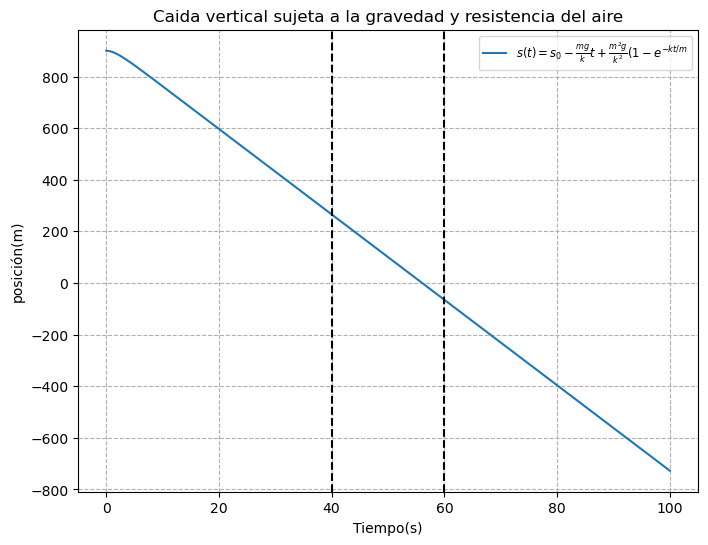

In [4]:
## grafico de la función s(t)

## suponiendo un tiempo de 100 segundos
t1 = np.linspace(0,100,200)
plt.figure(figsize = (8,6))
plt.plot(t1,caida(t1,g=g,k=k,s0=s0,m=m),label = r"$ s(t)=s_0-\frac{mg}{k} t + \frac{m^2g}{k^2}(1-e^{-kt/m} $")
plt.grid(True,linestyle = "dashed")
plt.title("Caida vertical sujeta a la gravedad y resistencia del aire")
plt.ylabel("posición(m)")
plt.xlabel("Tiempo(s)")
plt.legend(fontsize = "small")
plt.axvline(40, linestyle = "dashed", color = "black")
plt.axvline(60,linestyle ="dashed", color = "black")
plt.show()


In [5]:
### punto b. Tiempo de caida del objeto. ## como s me modela la altura del objeto
### s(t) = 0.
### Metodo de la secante.
cero_secante = scp.newton(s_1,x0 = 40 )
cero_secante


56.056536127964684

In [6]:
### metodo de Newton.
## calculo de la derivada.

#x=sp.symbols('x')
#m=sp.symbols('m')
#g=sp.symbols('g')
#k=sp.symbols('k')
#s0=sp.symbols('s0')
#t=sp.symbols('t')

#f = lambda t: s0-m*g*t/k + ((m**2 *g)/k**2) * (1 - sp.exp(-k*t/m))
# Primera derivada

#sp.diff(f(t), t, 1)


In [7]:
scp.newton(func = s_1,x0 = 40, fprime = s_1_ds)

56.056536127964684

In [8]:
## metodo de punto fijo.
g_s1 =  lambda t : t - caida(t,s0=s0,m=m,g=g,k=k)
#scp.fixed_point?
scp.fixed_point(g_s1,x0=55)

array(56.05653613)

In [9]:
## tiempo de caida para 10 masas distintas.
masas = np.linspace(0.25,1,10)

def tiempo_caida(g,k,s0,masas):
  tiempos = np.zeros(len(masas))
  for i in range(len(masas)):
    s_i = lambda t : caida(t,g = g, k = k, s0 = s0, m = masas[i])
    j = 0
    while s_i(j)>0:
      j+=1
    tiempo = scp.bisect(s_i,a = 0, b = j)
    tiempos[i] = tiempo
  return tiempos

print(tiempo_caida(g,k,s0,masas))


[56.05653613 43.02776244 35.43571386 30.56165377 27.23780282 24.87425281
 23.13730393 21.82408657 20.80583965 19.99838181]


43.02776244496512
35.43571385882114


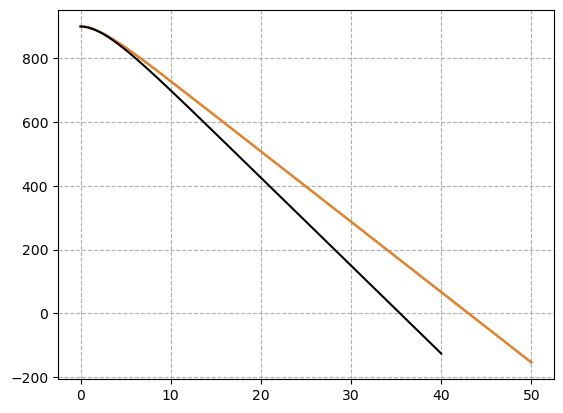

In [10]:
## confirmando los anteriores resultados
m2 = masas[1]
t2 = np.linspace(0,50,200)
params2 = (g,k,s0,m2)
plt.plot(t2,caida(t2,*params2))
s_2 = lambda t : caida(t,g=g,k=k,s0=s0,m=m2)
plt.plot(t2,s_2(t2))
print(scp.newton(s_2,x0 = 40))
m3 = masas[2]
t3 = np.linspace(0,40,200)
params3 = (g,k,s0,m3)
s_3 = lambda t : caida(t,g=g,k=k,s0=s0,m=m3)
plt.plot(t3,caida(t3,*params3), color = "black")
plt.grid(True,linestyle = "dashed")
print(scp.newton(s_3,x0=30))

## con estas dos confirmaciones verificamos la utilidad de la anterior función.

## segundo punto.
2.(30 Pts) Para el siguiente dataSet que contiene información del clima de un lugar determinado realizar lo siguiente:  ([Clima Data set](https://raw.githubusercontent.com/hernansalinas/autogrades/main/Evaluaciones/dataset/Temperature_Bogota_Barcelona.csv)).

a. Leer el data set.

b. Listar todas las columnas como una lista.

c. Determinar los elemenntos únicos de la columna Wheater

d. Crear un filtro para la columna  Wheater cuando toma el valor de  "Cloudy"

e. Para el filtro anterior,  realizar un gráfico de la columna "Temp_C" , "Press_kPa" como función del tiempo.


Ayudas.

Para generar la columna del  tiempo en numeral e necesario para la graficación,  emplee la siguiente linea:
```python
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
```

df.Time será la columna a lo largo de la cordenada independiente.



Algunos comandos de pandas:


|Comando|	Descripción|
|-------|------------|
|pd.read_csv()|	Lee un archivo CSV y lo convierte en un DataFrame de Pandas
|pd.read_excel()|	Lee un archivo de Excel y lo convierte en un DataFrame de |Pandas|
|pd.read_json()|	Lee un archivo JSON y lo convierte en un DataFrame de Pandas|
|df.head()|	Muestra las primeras filas del DataFrame|
|df.tail()|	Muestra las últimas filas del DataFrame|
|df.info()|	Muestra información sobre el DataFrame|
|df.describe()|	Muestra estadísticas descriptivas del DataFrame|
|df.dropna()|	Elimina filas con valores faltantes|
|df.drop_duplicates()|	Elimina filas duplicadas|
|df.groupby()	|Agrupa el DataFrame por una o más columnas|
|df.sort_values()|	Ordena el DataFrame por una o más columnas|
|df.to_csv()|	Guarda el DataFrame como un archivo CSV|
|df.loc[condicion]|	Crea una máscara booleana para seleccionar filas que cumplan con ciertas condiciones|
|df[df["columna"]== x]|	Crea una máscara booleana y a la aplica al dataframe en caso de el valor de la columna coincida con la variable|

In [11]:
## a) leer el dataset.
url = "https://raw.githubusercontent.com/hernansalinas/autogradesMetodosComputacionales/main/Dataset/Weather%20Data.csv"
df = pd.read_csv(url)
df["Time"]=pd.to_datetime (df["Date/Time"], format='%m/%d/%Y %H:%M')
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,2012-01-01 00:00:00
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,2012-01-01 01:00:00
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",2012-01-01 02:00:00
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",2012-01-01 03:00:00
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,2012-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow,2012-12-31 19:00:00
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow,2012-12-31 20:00:00
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow,2012-12-31 21:00:00
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow,2012-12-31 22:00:00


In [12]:
## b)  Nombres en una lista.
nombres = df.columns
nombres

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather', 'Time'],
      dtype='object')

In [13]:
## c) determinar los elementos unicos de la columna weather
weather = df["Weather"]
weather2 = set(weather)
weather2

{'Clear',
 'Cloudy',
 'Drizzle',
 'Drizzle,Fog',
 'Drizzle,Ice Pellets,Fog',
 'Drizzle,Snow',
 'Drizzle,Snow,Fog',
 'Fog',
 'Freezing Drizzle',
 'Freezing Drizzle,Fog',
 'Freezing Drizzle,Haze',
 'Freezing Drizzle,Snow',
 'Freezing Fog',
 'Freezing Rain',
 'Freezing Rain,Fog',
 'Freezing Rain,Haze',
 'Freezing Rain,Ice Pellets,Fog',
 'Freezing Rain,Snow Grains',
 'Haze',
 'Mainly Clear',
 'Moderate Rain,Fog',
 'Moderate Snow',
 'Moderate Snow,Blowing Snow',
 'Mostly Cloudy',
 'Rain',
 'Rain Showers',
 'Rain Showers,Fog',
 'Rain Showers,Snow Showers',
 'Rain,Fog',
 'Rain,Haze',
 'Rain,Ice Pellets',
 'Rain,Snow',
 'Rain,Snow Grains',
 'Rain,Snow,Fog',
 'Rain,Snow,Ice Pellets',
 'Snow',
 'Snow Pellets',
 'Snow Showers',
 'Snow Showers,Fog',
 'Snow,Blowing Snow',
 'Snow,Fog',
 'Snow,Haze',
 'Snow,Ice Pellets',
 'Thunderstorms',
 'Thunderstorms,Heavy Rain Showers',
 'Thunderstorms,Moderate Rain Showers,Fog',
 'Thunderstorms,Rain',
 'Thunderstorms,Rain Showers',
 'Thunderstorms,Rain Showers,

In [14]:
## d) mascara cuanto toma el valor de cloudy.
cloudy = df["Weather"] == "Cloudy"
df2 = df[cloudy]
df2

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Time
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy,2012-01-01 17:00:00
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy,2012-01-01 20:00:00
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy,2012-01-01 21:00:00
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,2012-01-01 23:00:00
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy,2012-01-02 01:00:00
...,...,...,...,...,...,...,...,...,...
8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy,2012-12-31 01:00:00
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy,2012-12-31 02:00:00
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy,2012-12-31 04:00:00
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy,2012-12-31 05:00:00


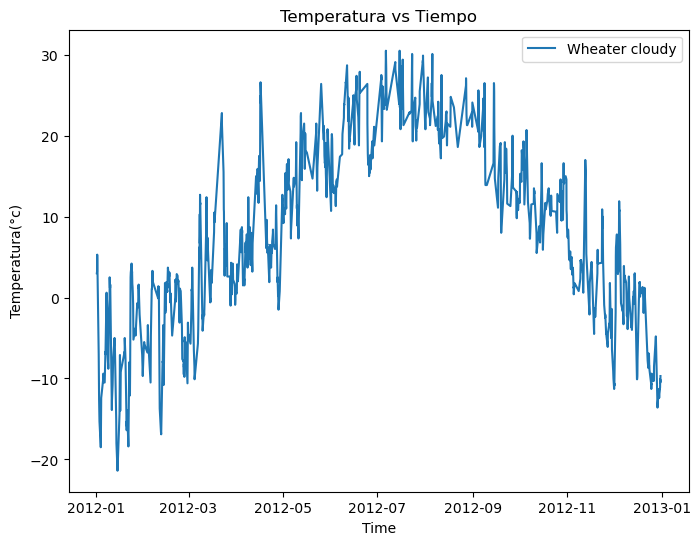

In [15]:
## punto e. Grafico de Temp_c vs time
plt.figure(figsize = (8,6))
plt.plot(df2.Time,df2.Temp_C,label = "Wheater cloudy" )
plt.title("Temperatura vs Tiempo")
plt.ylabel("Temperatura(°c)")
plt.xlabel("Time")
plt.legend()
plt.show()

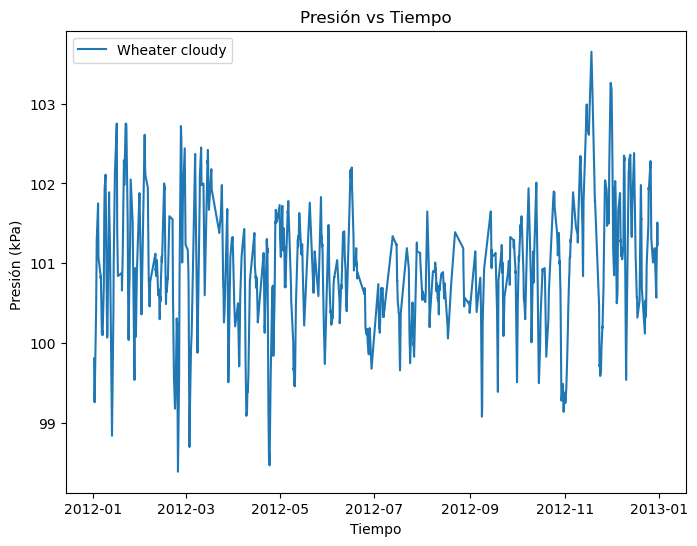

In [16]:
## punto e. Grafico de la presión en kilo pascales vs el tiempo
plt.figure(figsize = (8,6))
plt.plot(df2.Time,df2.Press_kPa,label = "Wheater cloudy")
plt.legend()
plt.title("Presión vs Tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Presión (kPa) ")
plt.show()